<a href="https://colab.research.google.com/github/jaydevpaul/ML_from_Scratch/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [147]:
data=pd.read_csv('/content/Social_Network_Ads.csv')
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)



scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [149]:
def sigmoid(w,b,x):
  z=np.dot(x,w)+b
  z = np.clip(z, -500, 500)  # Prevent overflow in exp()
  z=1/(1+np.exp(-z))
  # z = np.clip(z, -500, 500)
  return z

In [150]:
def cost(x,y,w,b):
  x=sigmoid(w,b,x);

  z=-np.mean(y*np.log(x)+(1-y)*np.log(1-x))
  return z

In [151]:
def gradient(x,y,w,b):
  n=x.shape[0]
  m=x.shape[1]
  # w_grad=np.zeros(m)
  z=sigmoid(w,b,x)
  z-=y
  w_grad=np.matmul(x.T,z);
  w_grad/=n
  b_grad=np.sum(z)
  b_grad/=n

  return w_grad,b_grad;


In [152]:
def descent(x, y, w, b, alpha, iterations=10000):
    for i in range(iterations):
        w_grad, b_grad = gradient(x, y, w, b)
        w -= alpha * w_grad
        b -= alpha * b_grad
    return w,b

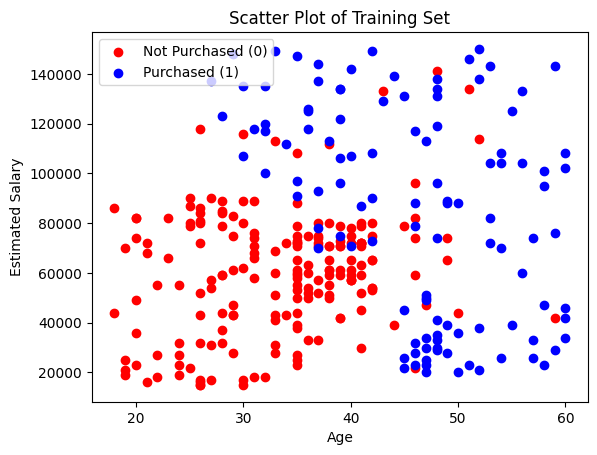

In [153]:
import matplotlib.pyplot as plt


plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color='red', label="Not Purchased (0)")
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color='blue', label="Purchased (1)")

plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Scatter Plot of Training Set")
plt.legend()
plt.show()

In [154]:
w = np.zeros(x_train_scaled.shape[1])
b = 0
alpha = 0.01
w, b = descent(x_train_scaled, y_train, w, b, alpha)


In [155]:
y_pred=sigmoid(w,b,x_test_scaled)


for i in range(len(y_pred)):
  if y_pred[i]>=0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0





y_pred



array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.])

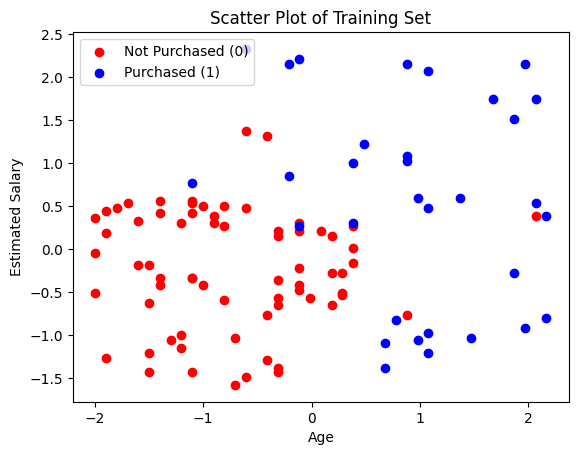

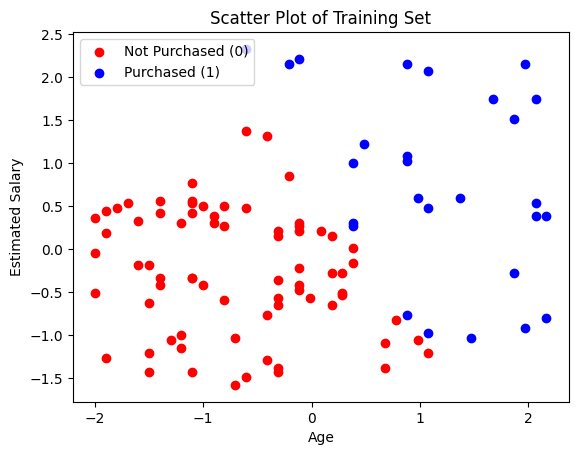

In [164]:
plt.scatter(x_test_scaled[y_test == 0, 0], x_test_scaled[y_test == 0, 1], color='red', label="Not Purchased (0)")
plt.scatter(x_test_scaled[y_test == 1, 0], x_test_scaled[y_test == 1, 1], color='blue', label="Purchased (1)")

plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Scatter Plot of test Set original")
plt.legend()
plt.show()



plt.scatter(x_test_scaled[y_pred == 0, 0], x_test_scaled[y_pred == 0, 1], color='red', label="Not Purchased (0)")
plt.scatter(x_test_scaled[y_pred == 1, 0], x_test_scaled[y_pred == 1, 1], color='blue', label="Purchased (1)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Scatter Plot of Training Set predicted")
plt.legend()
plt.show()

In [157]:
print(w)

[2.22509326 1.19102527]


In [158]:
print(b)

-0.9882570204897685


In [159]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.89

In [160]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train_scaled, y_train)

LogisticRegression(random_state=0)

In [161]:
y_pred2 = classifier.predict(x_test_scaled)
accuracy_score(y_test,y_pred2)


0.89